In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [3]:
df = pd.read_excel('Concrete_Data.xls')
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse gravel',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine gravel',
    'Concrete compressive strength(MPa, megapascals)': 'strength [MPa]'
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cement          1030 non-null   float64
 1   slag            1030 non-null   float64
 2   ash             1030 non-null   float64
 3   water           1030 non-null   float64
 4   plasticizer     1030 non-null   float64
 5   coarse gravel   1030 non-null   float64
 6   fine gravel     1030 non-null   float64
 7   Age (day)       1030 non-null   int64  
 8   strength [MPa]  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,cement,slag,ash,water,plasticizer,coarse gravel,fine gravel,Age (day),strength [MPa]
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## Ploting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


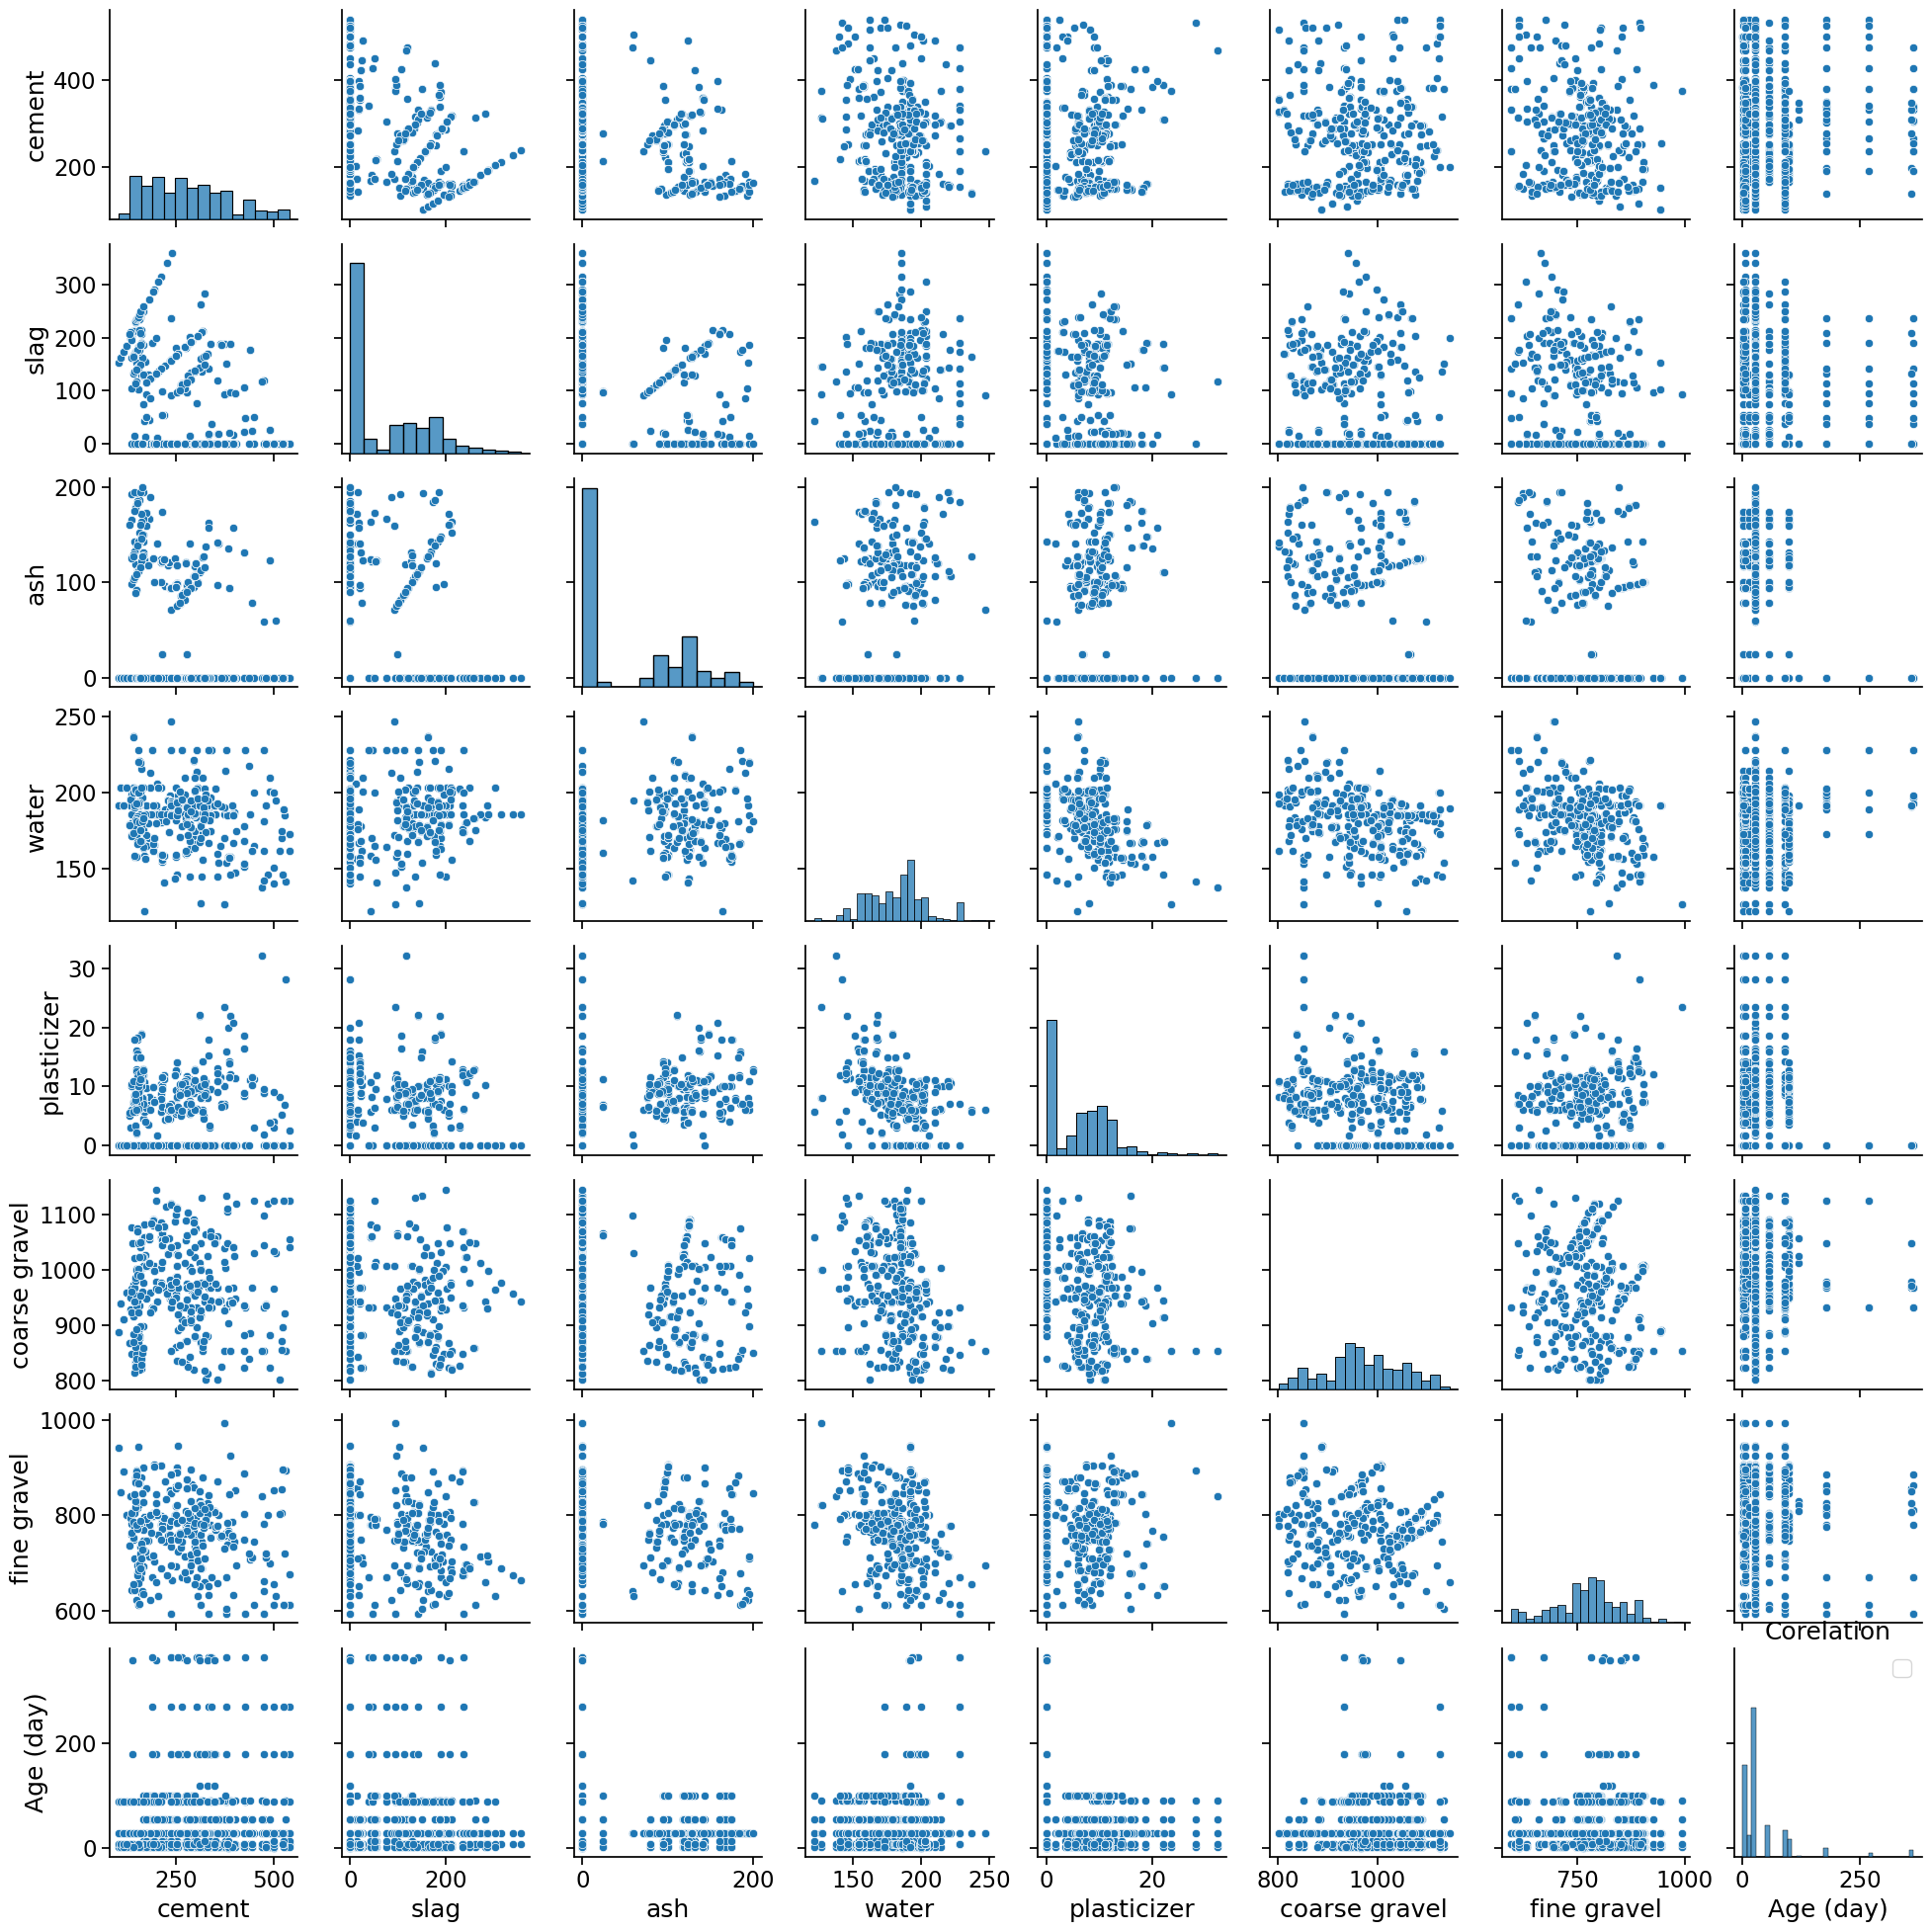

In [6]:
sns.set_context("notebook", font_scale=1.5)
sns.pairplot(df.loc[:, (df.columns != 'strength [MPa]')])
plt.title('Corelation')
plt.legend()      

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'cement'),
  Text(0, 1.5, 'slag'),
  Text(0, 2.5, 'ash'),
  Text(0, 3.5, 'water'),
  Text(0, 4.5, 'plasticizer'),
  Text(0, 5.5, 'coarse gravel'),
  Text(0, 6.5, 'fine gravel'),
  Text(0, 7.5, 'Age (day)'),
  Text(0, 8.5, 'strength [MPa]')])

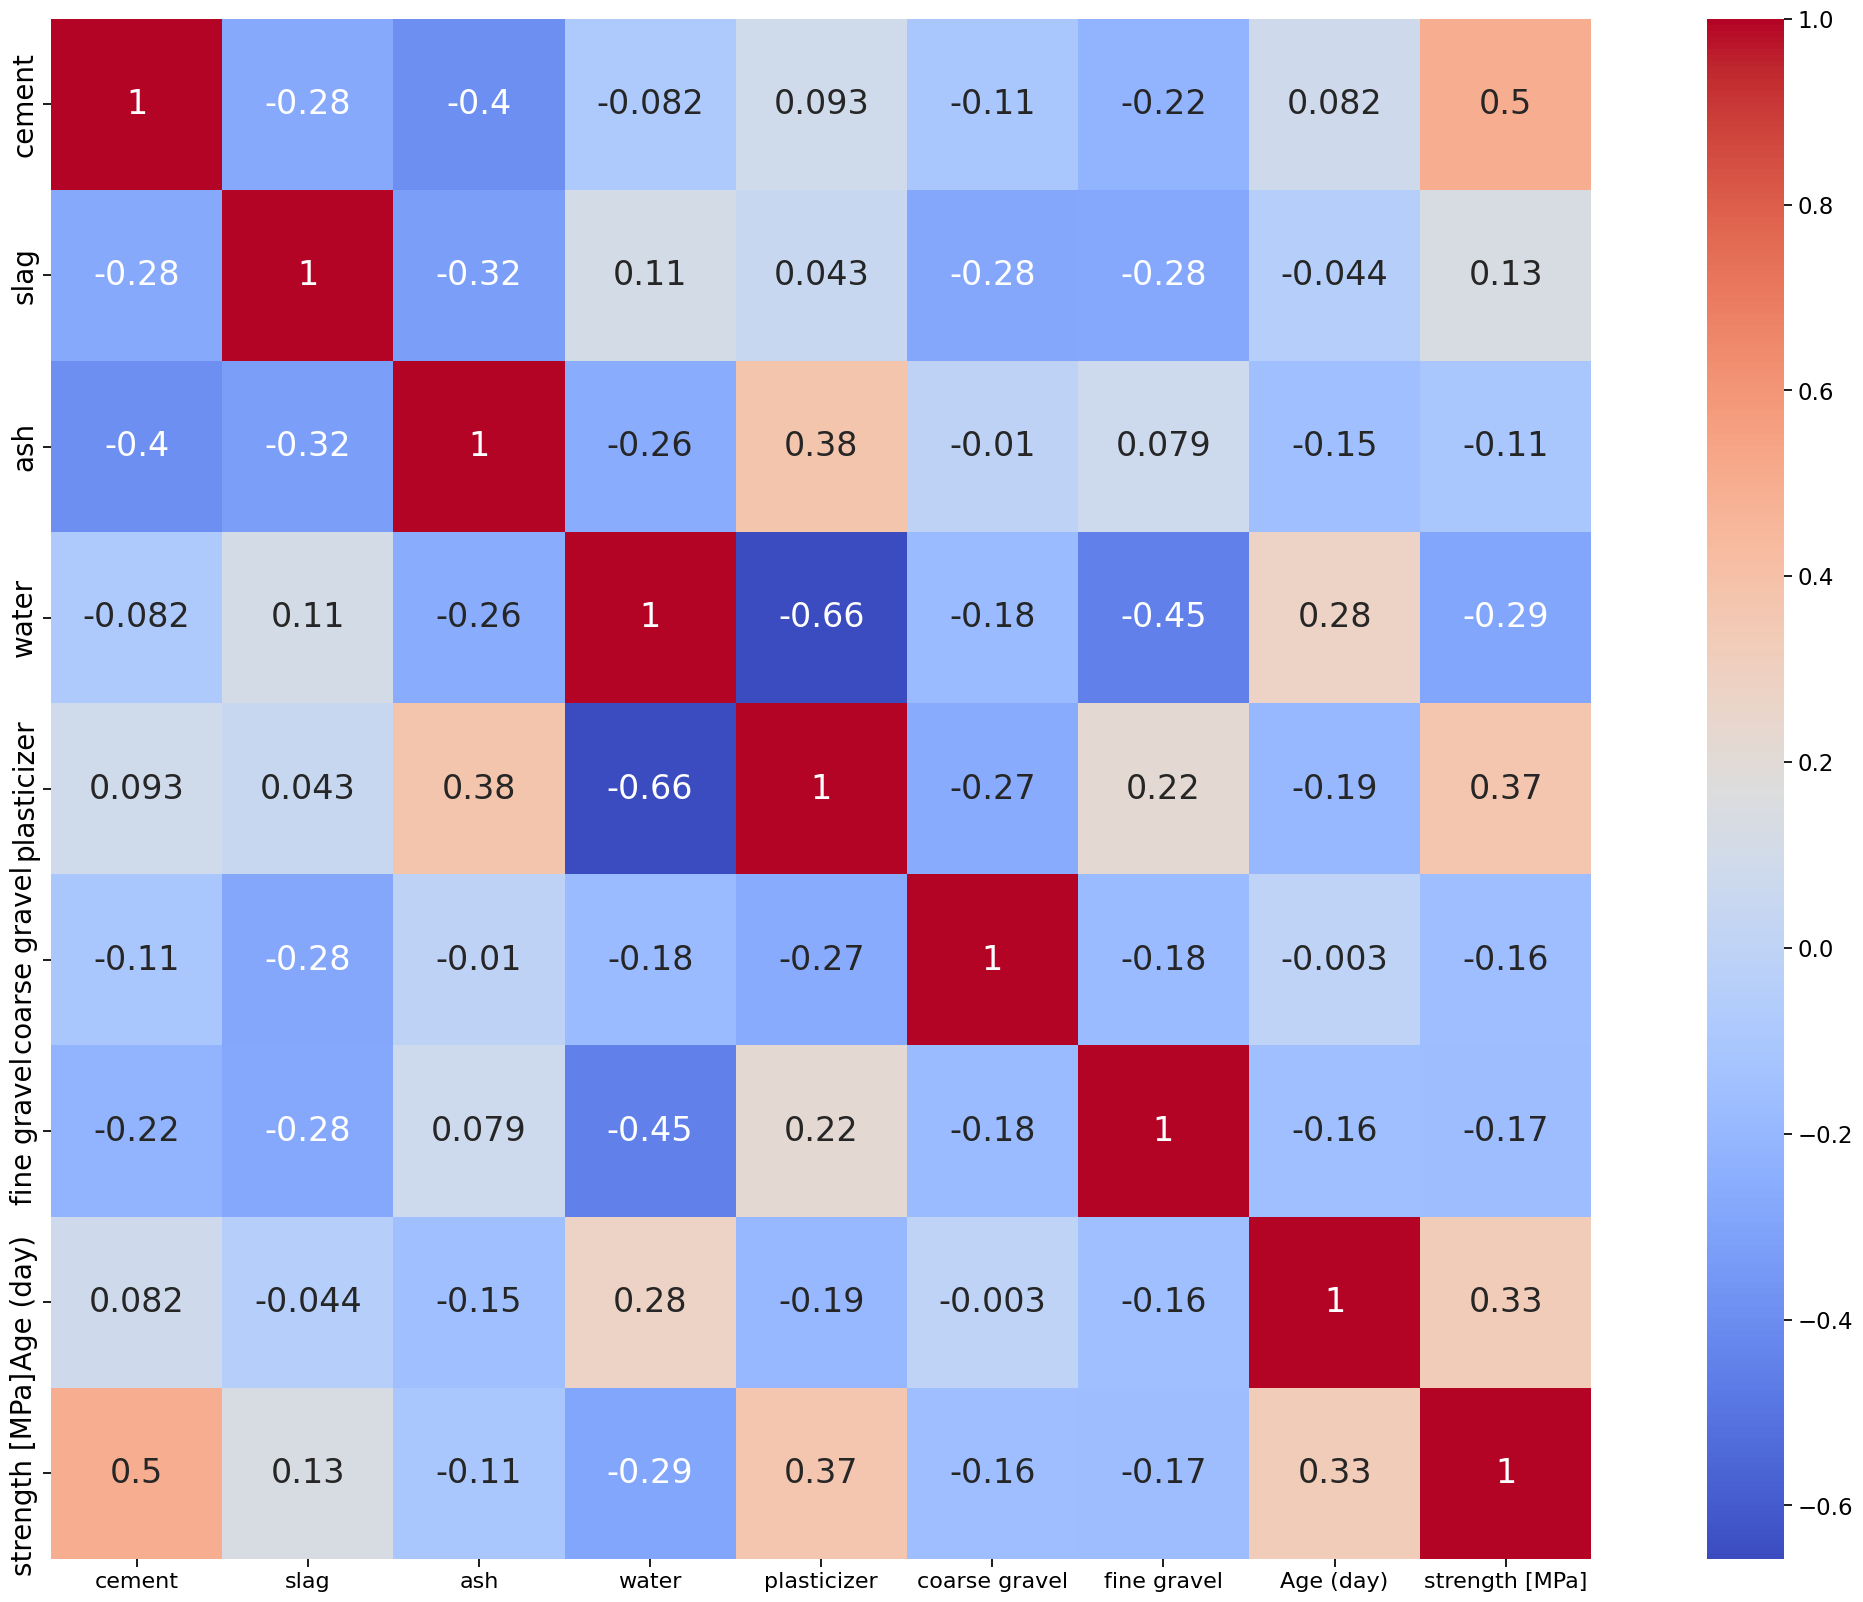

In [7]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='coolwarm', annot_kws={"size": 24})
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)

<Axes: >

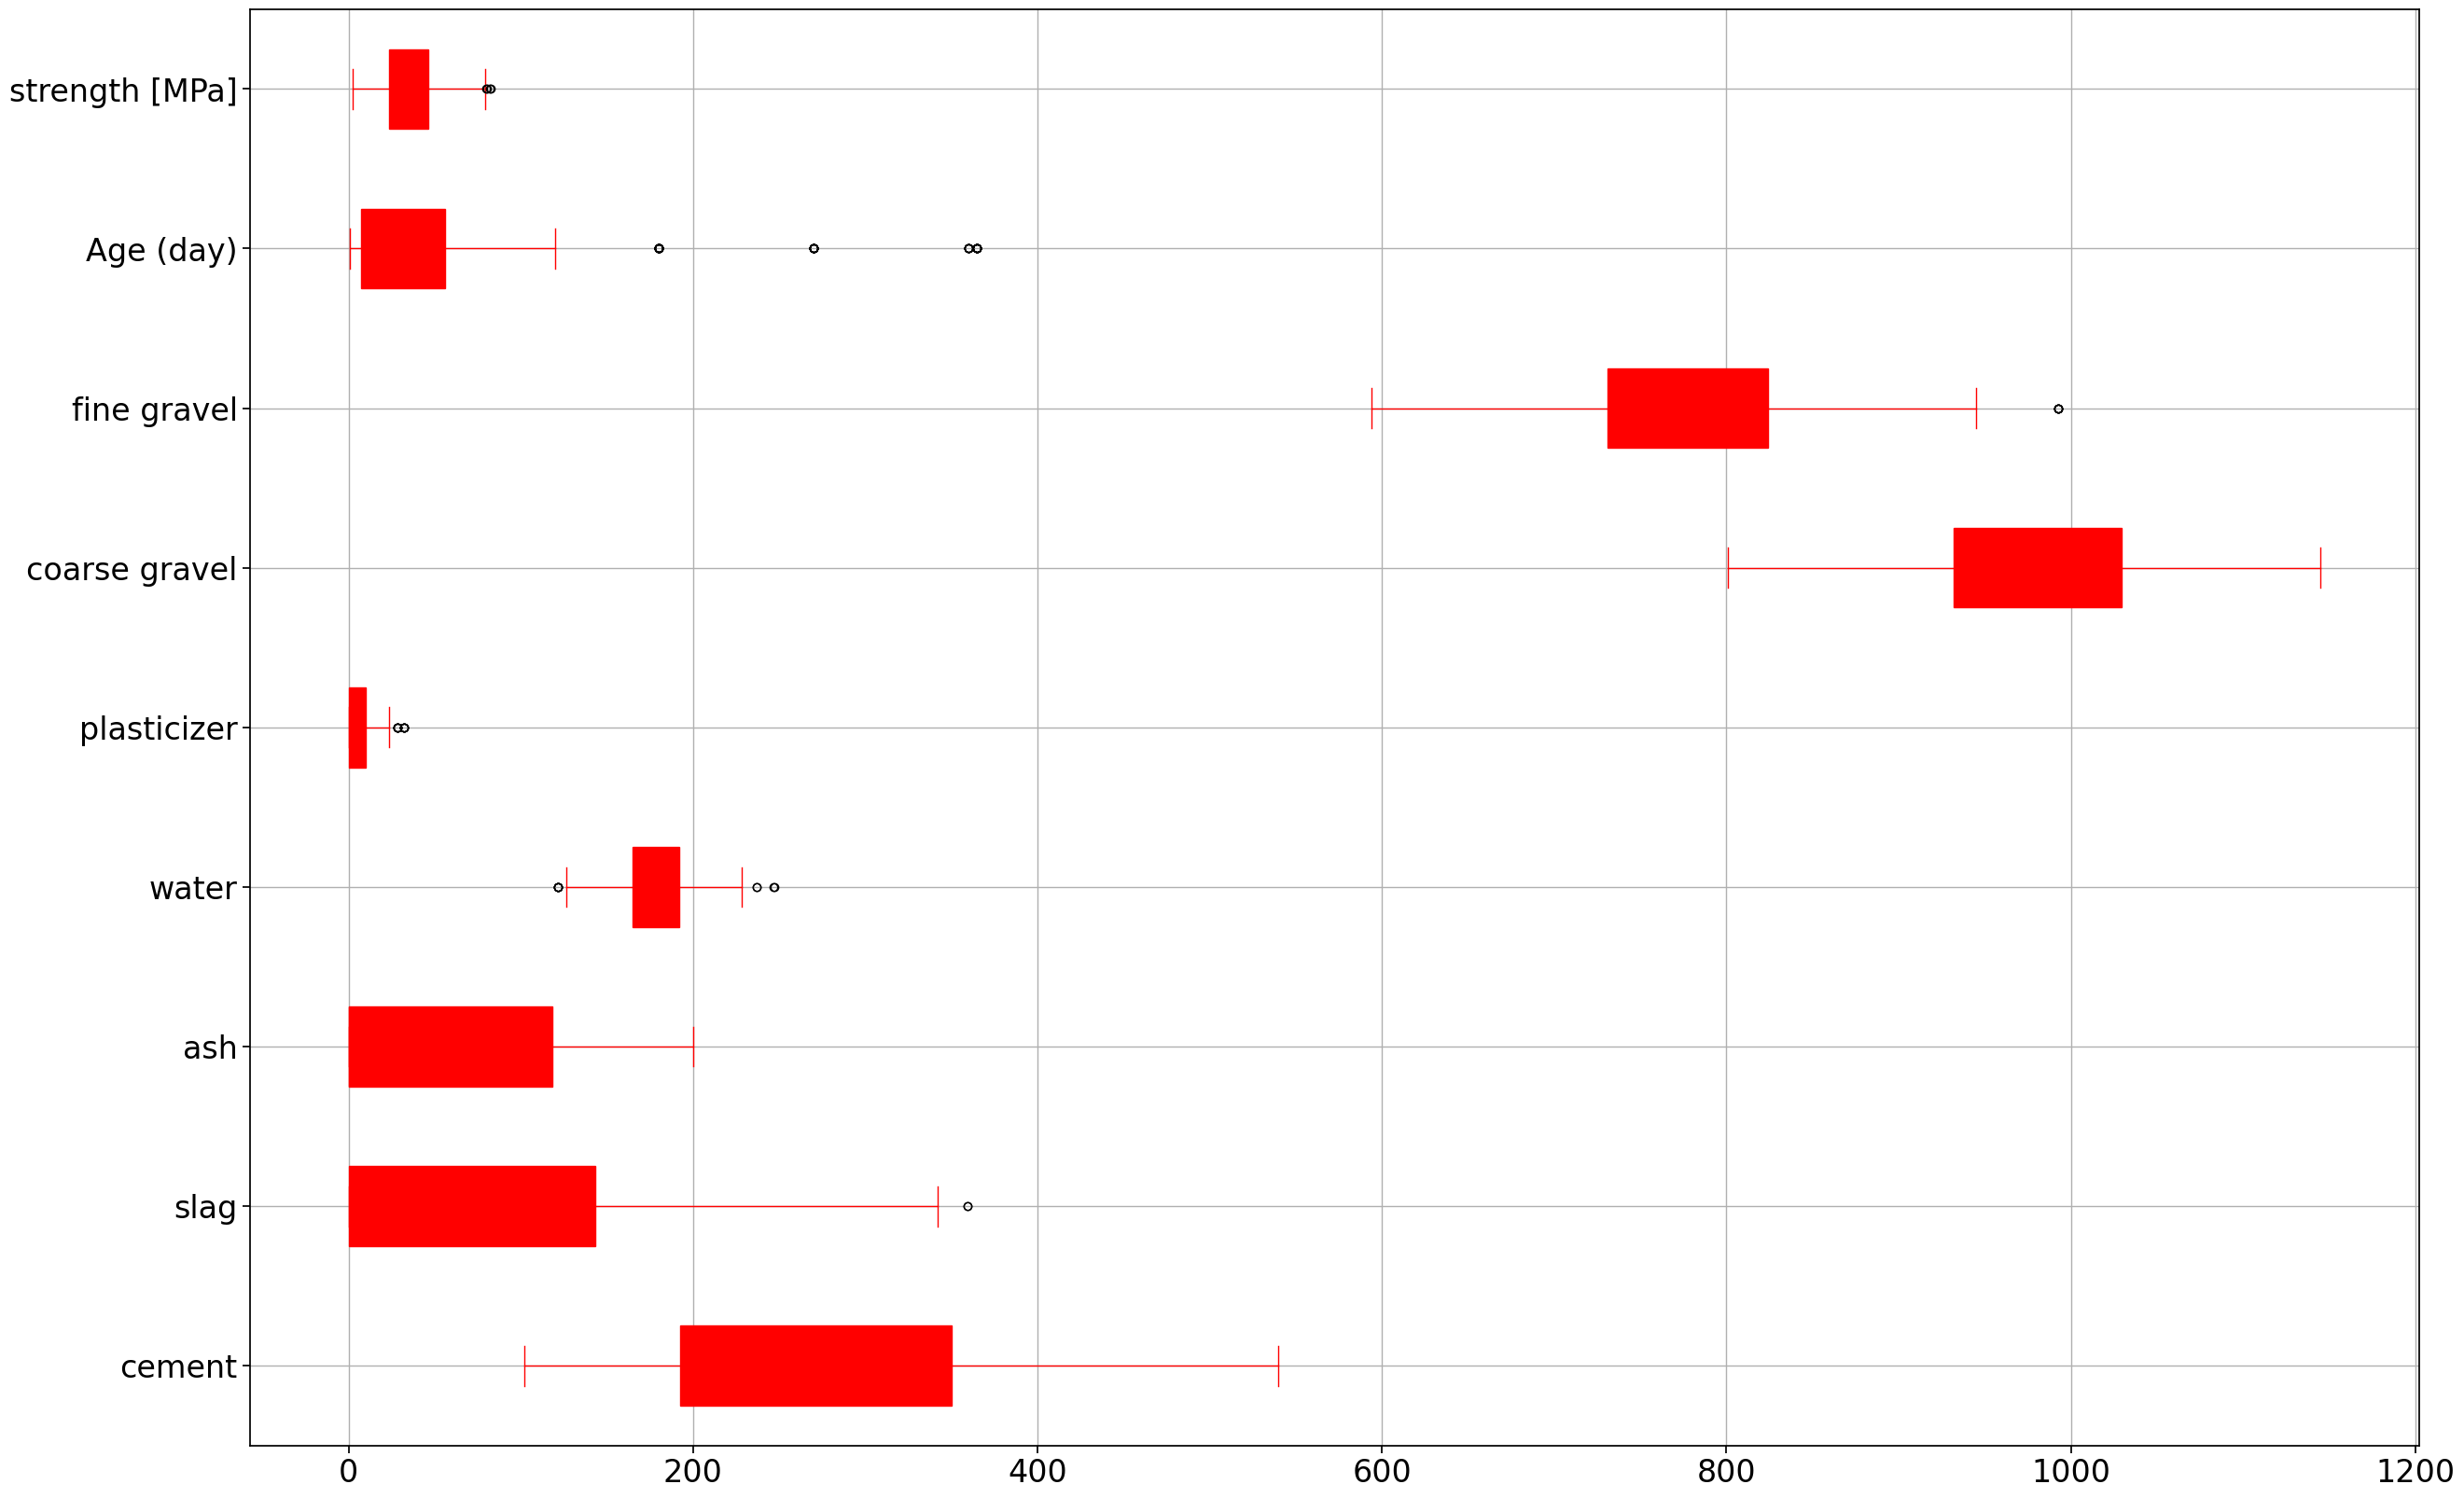

In [8]:
df.boxplot(figsize=(30,20), grid=True, vert=False, patch_artist=True, color='red', fontsize=24)

<Axes: >

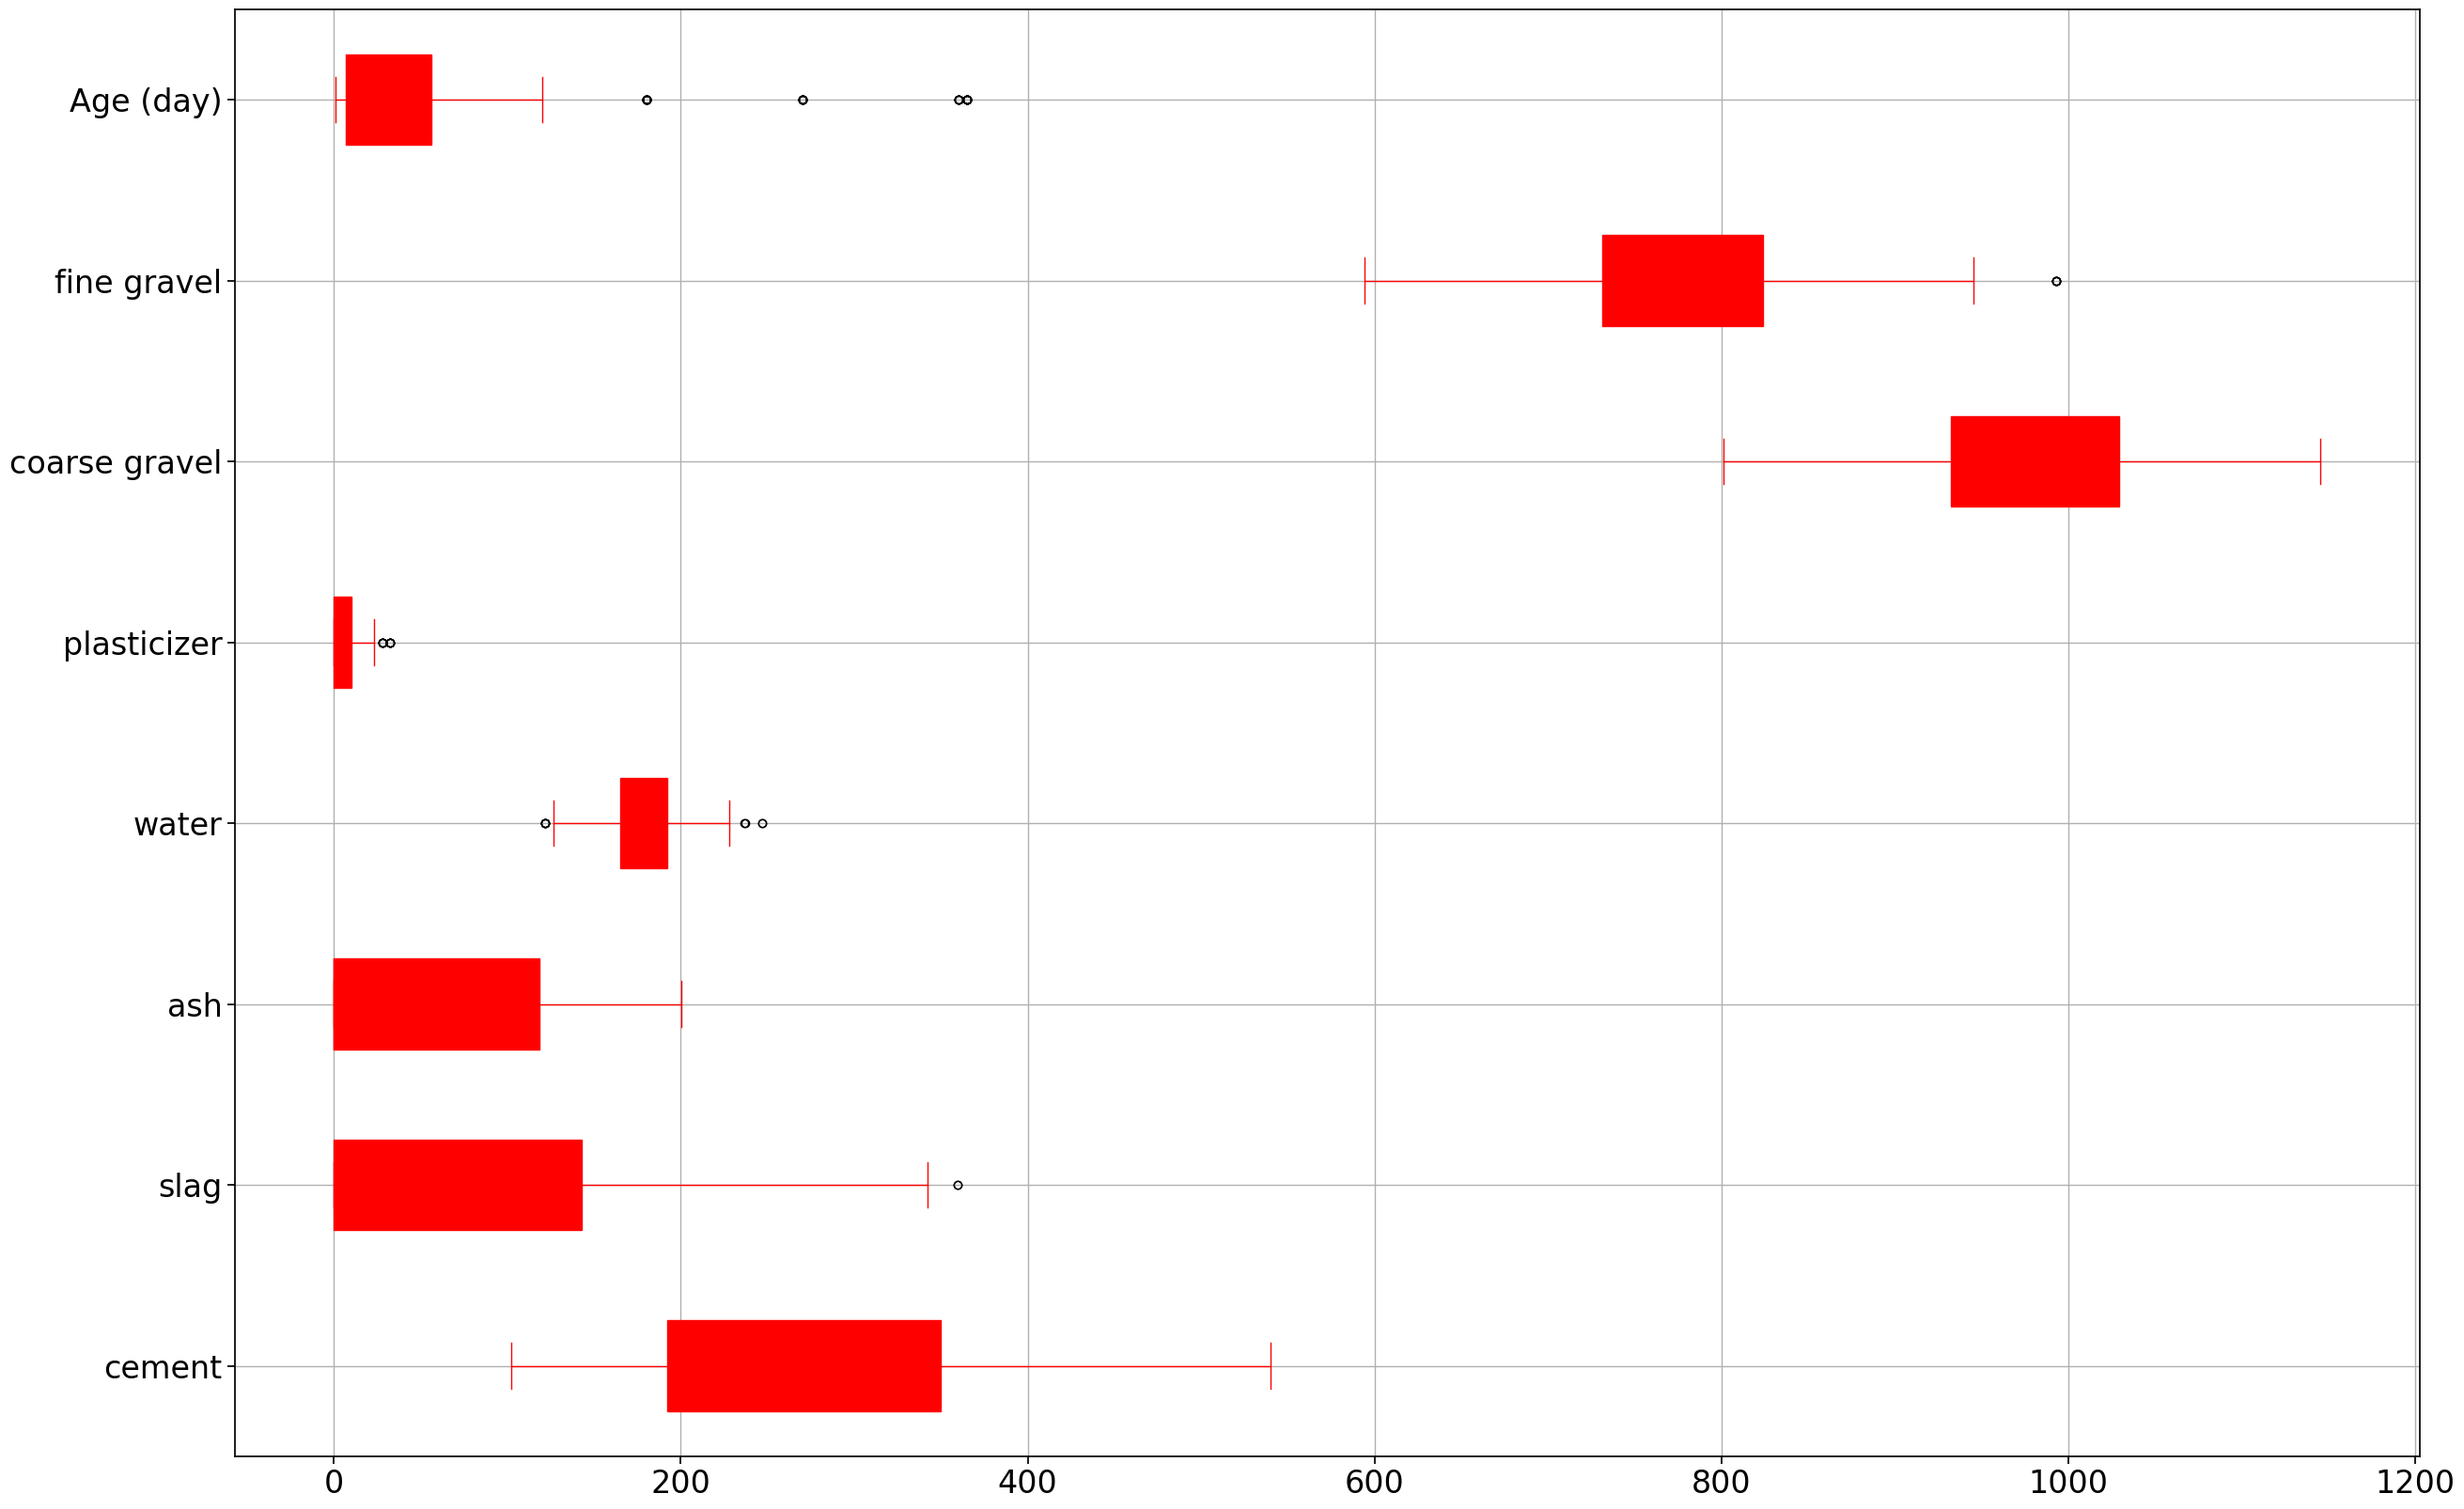

In [9]:
df.drop(columns=['strength [MPa]']).boxplot(figsize=(30,20), grid=True, vert=False, patch_artist=True, color='red', fontsize=24)

## Machine Learning

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [11]:
X = df.drop('strength [MPa]', axis=1)
y = df['strength [MPa]']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

#### Linear Regression

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)
print("Linear Regression score:", lr_score)

Linear Regression score: 0.6545523098543615


##### Coefficients & intecept of Linear Regression model

In [14]:
coefficients = lr_model.coef_
intercept = lr_model.intercept_
print("Regression coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Regression coefficients:
cement: 0.11725596927521066
slag: 0.10166881439122717
ash: 0.08537447960089395
water: -0.15605417911470384
plasticizer: 0.28597962219625295
coarse gravel: 0.015375261078686907
fine gravel: 0.019253263923043776
Age (day): 0.11209591509783312


In [15]:
print("Intercept:", intercept)

Intercept: -17.740238294749062


In [16]:
import statsmodels.api as sm

In [17]:
intercept = sm.add_constant(coef)
print(coef)

0.11209591509783312


#### K-NN

In [18]:
knn_model_reg = KNeighborsRegressor(n_neighbors=7)
knn_model_reg.fit(X_train, y_train)
knn_score = knn_model_reg.score(X_test, y_test)
print('KNN score:', knn_score)

KNN score: 0.7404411967335317


#### Random Forest Regressor

In [19]:
rfr = RandomForestRegressor(n_estimators=250, random_state=32)
rfr.fit(X_train, y_train)
rfr_score = rfr.score(X_test, y_test)
print('RFR score:', rfr_score)

RFR score: 0.9130417492376759


### Neural Networks

#### MLPRegressor

In [20]:
from sklearn.neural_network import MLPRegressor

In [21]:
mlp_regressor_1 = MLPRegressor(hidden_layer_sizes=(200,100,100), activation= 'relu')
mlp_regressor_1.fit(X_train, y_train)
y_pred = mlp_regressor_1.predict(X_test)
mlp_score_1 = mlp_regressor_1.score(X_test, y_test)
print("MLPRegressor_1 score:", mlp_score_1)

MLPRegressor_1 score: 0.8293456613882821


In [22]:
mlp_regressor_2 = MLPRegressor(hidden_layer_sizes=(400,300,200,100,50), activation= 'relu', solver='lbfgs', max_iter=2000)
mlp_regressor_2.fit(X_train, y_train)
y_pred = mlp_regressor_2.predict(X_test)
mlp_score_2 = mlp_regressor_2.score(X_test, y_test)
print("MLPRegressor_2 score:", mlp_score_2)

MLPRegressor_2 score: 0.9055102061549122


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


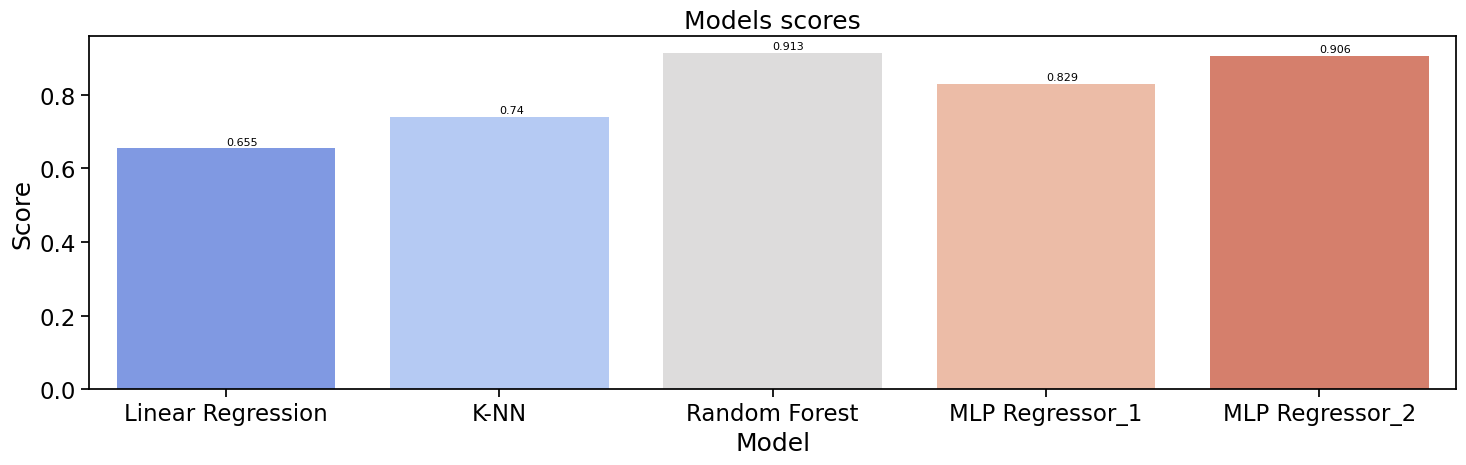

In [23]:
results = {
    'Model': ['Linear Regression', 'K-NN', 'Random Forest', 'MLP Regressor_1', 'MLP Regressor_2'],
    'Score': [lr_score, knn_score, rfr_score, mlp_score_1, mlp_score_2]
}

plt.figure(figsize=(15, 5))
ax = sns.barplot(x='Model', y='Score', data=results, hue='Model', palette='coolwarm')
ax.set_title('Models scores')
ax.set_xlabel('Model')
ax.set_ylabel('Score')

for index, value in enumerate(results['Score']):
    ax.text(index, value+0.01, str(round(value, 3)), fontsize=8)

plt.xticks()
plt.tight_layout()
plt.show()

#### Results summary